# Bài thu hoạch lớp AI nâng cao
### Giảng viên: Ths. Nguyễn Hải Đăng, Mr. Đỗ Trọng Lễ.
- Thời gian làm bài: 2 tuần.
- Deadline: **23g00 ngày 14/02/2022.**

## Hướng dẫn làm bài:
1. Các bạn download notebook này về dưới dạng file .ipynb, sau đó tải file lên trang Google Colab của bạn và tiến hành làm bài.
2. Google Colab có 02 loại ô, 1 loại ô để chạy code python, 1 loại ô để hiển thị nội dung chữ theo kiểu Markdown (Cú pháp Markdown căn bản: https://quantrimang.com/cu-phap-markdown-can-ban-163963). 
3. Đối với các bài tập câu hỏi yêu cầu code, các bạn cần phải chạy code để ra kết quả bên dưới.
4. Đối với các bài tập câu hỏi lý thuyết, các bạn trả lời bằng cách thêm câu trả lời ngay tại ô đó.
5. Các bạn điền thông tin **Mã số học viên** và **Họ tên** bằng cách chỉnh sửa nội dung ngay tại ô này.
6. Hướng dẫn nộp bài nằm ở cuối bài làm.

### Mã số học viên: AIC2021-SV501
### Họ và tên: Võ Thương Trường Nhơn

# Bài tập lập trình:


Chuẩn bị sẵn các thư viện cần dùng (trong trường hợp các bạn dùng thêm thư viện nào khác có thể thêm vào phần này):

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
# from sklearn.datasets.samples_generator import make_blobs
import time

## 1. Hồi quy tuyến tính (Linear Regression):
Ở bài tập này, các bạn thực hành áp dụng mô hình hồi quy tuyến tính vào bài toán dự đoán giá nhà ở.
Dữ liệu giá nhà ở các bạn có thể tải về ở link sau: [Dữ liệu giá nhà ở](https://drive.google.com/file/d/1z2pwvBt_5-cDZRqVaI9I8QcW8uTQT_vx/view?usp=sharing)

**Yêu cầu thực hiện**: các bạn cần thực hành ***phân tích dữ liệu*** và ***lựa chọn đặc trưng phù hợp*** để mô hình hồi quy tuyến tính đơn giản đạt được kết quả tốt nhất. Sau đó các bạn có thể tham khảo thêm một vài kỹ thuật nâng cao để tăng độ chính xác (phần này không bắt buộc).

Các bạn có thể tham khảo cách làm từ những kỹ thuật cơ bản đến nâng cao về hồi quy tuyến tính trong notebook mẫu trên kaggle: [Practical Introduction to 10 Regression Algorithm](https://www.kaggle.com/faressayah/practical-introduction-to-10-regression-algorithm)



### Đọc dữ liệu đầu vào
Đoạn code bên dưới dùng để đọc dữ liệu được tải ở trên và để tại thư mục các bạn thực thi notebook này. Các bạn có thể kiểm tra các thuộc tính/đặc trưng liên quan đến giá nhà ở tại mỗi dòng của dữ liệu.

In [37]:
house_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_data.csv',index_col = 0)

In [ ]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7.0,1180.0,0.0,1955.0,0.0,98178,47.511234,-122.256775,1340.0,5650.0
1,6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7.0,2170.0,400.0,1951.0,1991.0,98125,47.721023,-122.318862,1690.0,7639.0
2,5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6.0,770.0,0.0,1933.0,0.0,98028,47.737927,-122.233196,2720.0,8062.0
3,2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7.0,1050.0,910.0,1965.0,0.0,98136,47.520820,-122.393185,1360.0,5000.0
4,1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8.0,1680.0,0.0,1987.0,0.0,98074,47.616812,-122.044901,1800.0,7503.0


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  float64
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  float64
 15  yr_renovated   21613 non-null  float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140825,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155933,-122.518648,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328154,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571794,-122.230495,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677985,-122.124764,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777624,-121.315091,6210.000000,871200.000000


In [ ]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Phân tích dữ liệu
Ở phần này các bạn cần vẽ thử biểu đồ để xem xét mối quan hệ giữa từng thuộc tính có ảnh hưởng đến giá hay không, từ đó đưa ra nhận xét và lựa chọn những thuộc tính thích hợp cho bước sau

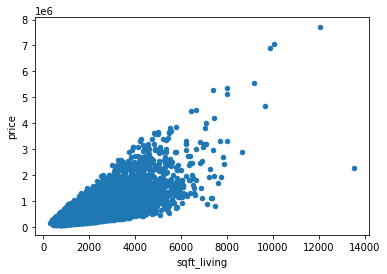

In [ ]:
house_df.plot.scatter('sqft_living', 'price')

Trong biểu đồ trên ta có thể thấy một mối quan hệ có xu hướng tuyến tính giữa diện tích ở sqft_living và giá price. Bạn hãy thử tìm những thuộc tính khác.

In [ ]:
sns.pairplot(house_df)

Output hidden; open in https://colab.research.google.com to view.

##=> Trừ hai thuộc tính ngày và ID còn lại lấy hết

### Xây dựng mô hình và đánh giá

Phần này các bạn có thể tham khảo tương tự [Practical Introduction to 10 Regression Algorithm](https://www.kaggle.com/faressayah/practical-introduction-to-10-regression-algorithm). 

Lưu ý các bạn cần chọn những thuộc tính phù hợp và những siêu tham số phù hợp (nếu có)


In [ ]:
# Code của bạn tại đây
data_end = int(np.floor(0.8*(house_df.shape[0])))
# lấy cái mốc là data_end theo tử lệ 2:8
train_df = house_df[0:data_end] 
# lấy 80% là giá mỏ cho tập train
test_df = house_df[data_end:]
# lấy 20% data là giá mở cho tập test
print(train_df.shape)
print(test_df.shape)

(17290, 21)
(4323, 21)


In [ ]:
# x_train = train_df[['bedrooms', 'bathrooms', 'sqft_living','sqft_above', 'sqft_living15']]
x_train = train_df[['bedrooms', 'bathrooms', 'sqft_living',
                    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y_train = train_df['price'] 

x_test = test_df[['bedrooms', 'bathrooms', 'sqft_living',
                    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y_test = test_df['price'] 

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
pred = lin_reg.predict(x_test)

In [ ]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})

,True Values,Predicted Values
17290,380000.0,678884.417979
17291,624900.0,678884.417979
17292,379770.0,316913.602007
17293,340000.0,426125.416650
17294,515500.0,572968.812951
...,...,...
21608,360000.0,440736.998286
21609,400000.0,411393.573636
21610,402101.0,107782.236106
21611,400000.0,360700.665869


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 131276.23965206632
MSE: 43232068918.70689
RMSE: 207923.22842507734
R2 Square 0.6852167647162268
__________________________________
Train set evaluation:
_____________________________________
MAE: 124864.0086342444
MSE: 40044809351.11665
RMSE: 200111.99202225902
R2 Square 0.7009379925587134
__________________________________


## 2. Phân cụm / Phân nhóm và Phân loại (Clustering and Classification):

Ở bài này các bạn cần xem lại thuật toán phân cụm / phân nhóm (clustering) có tên gọi là K-Means, sau đó xem thuật toán k láng giềng gần nhất (k nearest neighbor - KNN). Các bạn làm theo hướng dẫn sau:

- Các bạn hoàn tất đoạn mã nguồn định nghĩa hàm kmeans. Hàm nhận giá trị đầu vào X là dữ liệu đầu vào, k là số lượng các nhóm, và maxiter là số lượng tối đa các vòng lặp của thuật toán. Một tham số thêm có thể là seed để sinh ngẫu nhiên cho mỗi lần chạy.
- Hàm kmeans phải trả về các điểm trung tâm (centroids) của k nhóm, và nhóm của tất cả các điểm dữ liệu.
- (điểm cộng) Lưu lại vị trí của các centroids sau mỗi lần cập nhật ở mỗi vòng lặp.

### Tạo dữ liệu đầu vào:
Đoạn code bên dưới được cung cấp sẵn dùng để tạo dữ liệu đầu vào cho thuật toán K-Means và trực quan hóa dữ liệu thông qua biểu đồ.

(300, 2)


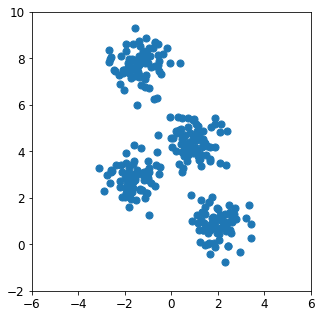

In [ ]:
# Cấu hình các tham số
Nb_cluster =  4
numIterations = 100
X, y = make_blobs(n_samples = 300, centers = 4,
                  random_state = 0, cluster_std = 0.6)

data = X
print(X.shape)
# print(X)

# change default figure and font size
plt.rcParams['figure.figsize'] = 5, 6 
plt.rcParams['font.size'] = 12

# scatter plot
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()

###link file myfile.csv
https://drive.google.com/file/d/1NnZFJdWM3j2svntQe-UiDSSAac2G7Qyx/view?usp=sharing

In [ ]:
# chuyển đổi array sang csv
df = pd.DataFrame(X)
df.to_csv('myfile.csv')

In [ ]:
# đọc file csv
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/myfile.csv')
X.head()

,Unnamed: 0,X1,X2,Y
0,0,0.836857,2.136359,1
1,1,-1.413658,7.409623,3
2,2,1.155213,5.099619,0
3,3,-1.018616,7.814915,3
4,4,1.271351,1.892542,1


In [ ]:
X.describe()

,Unnamed: 0,X1,X2,Y
count,300.000000,300.000000,300.000000,300.000000
mean,149.500000,-0.006328,3.967821,1.500000
std,86.746758,1.636000,2.593963,1.119902
min,0.000000,-3.122407,-0.765892,0.000000
25%,74.750000,-1.498837,1.916025,0.750000
50%,149.500000,-0.044497,3.529012,1.500000
75%,224.250000,1.433350,5.607633,2.250000
max,299.000000,3.437618,9.282932,3.000000


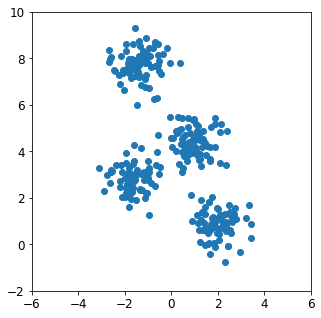

In [ ]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 5, 6 
plt.rcParams['font.size'] = 12

plt.scatter(X.iloc[:,1],X.iloc[:,2])
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()


In [ ]:
#Step-1 initialization random_centroids
k = 4
np.random.seed(40)

random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(-2,2), np.random.randint(-2,8)])
print('Randomly selected points as random_centroids:',random_centroids)


Randomly selected points as random_centroids: [[0, 5], [-1, 6], [-2, 0], [-1, 5]]


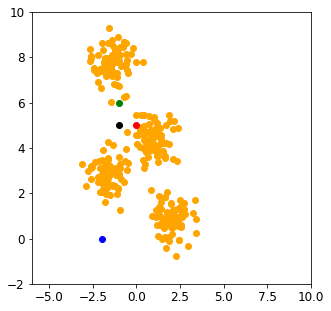

In [ ]:
# plotting the random_centroids 

plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color='orange')
length = len(random_centroids)
colors1=['r','g','b','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

### Hàm kmeans định nghĩa thuật toán K-Means

In [ ]:
#Step-2

def assignment(X,random_centroids):
  for i in range(length) :
    X['Distance from Centroid {}'.format(i)]=(np.sqrt((X.iloc[:,1] - random_centroids[i][0]) ** 2 + (X.iloc[:,2] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c,e in zip(X['Distance from Centroid 0'],X['Distance from Centroid 1'],X['Distance from Centroid 2'],X['Distance from Centroid 3']):
    d = min(a,b,c,e)
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    elif d == c:
      list1.append(2)
      list2.append('b')
    elif d ==e:
      list1.append(3)
      list2.append('black')
  X['Closest_Centroid'] = list1
  X['Color']=list2
  return X 

### Áp dụng thuật toán K-Means lên bộ dữ liệu được sinh ra ở trên.

In [ ]:
X = assignment(X, random_centroids)
X.head()

,Unnamed: 0,X1,X2,Y,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Distance from Centroid 3,Closest_Centroid,Color
0,0,0.836857,2.136359,1,2.983415,4.278056,3.551308,3.402129,0,r
1,1,-1.413658,7.409623,3,2.793692,1.469065,7.432786,2.444872,1,g
2,2,1.155213,5.099619,0,1.159500,2.335729,5.996789,2.157514,0,r
3,3,-1.018616,7.814915,3,2.993547,1.815010,7.876294,2.814976,1,g
4,4,1.271351,1.892542,1,3.357474,4.693639,3.779346,3.849069,0,r


(-6.0, 10.0)

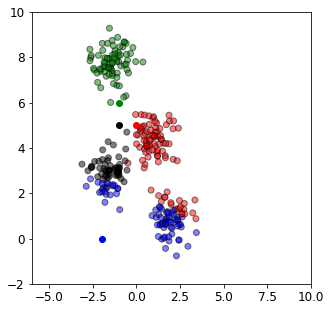

In [ ]:
#Plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(X.iloc[:,1],X.iloc[:,2],color =X['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.ylim(-2, 10)
plt.xlim(-6, 10)

### Hàm cập nhật trọng số **random_centroids** thuật toán K-Means

In [ ]:
#Step-3

#Update Stage
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(X[X['Closest_Centroid'] == i]['X1'])
        random_centroids[i][1] = np.mean(X[X['Closest_Centroid'] == i]['X2'])
    return parameter

In [ ]:
random_centroids = update(random_centroids)
random_centroids

[[1.2420106155104162, 3.7631290297708335],
 [-1.373243979186667, 7.7536887094],
 [0.7959592436623376, 1.0890131431038963],
 [-1.5274398259423074, 3.148177191596154]]

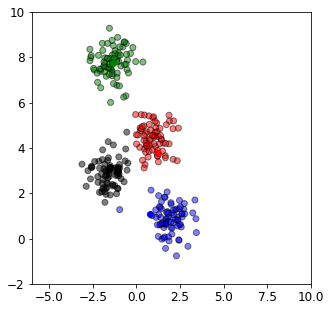

In [ ]:
#Repeat Assignment Step
#Here, we are again calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
X = assignment(X, random_centroids)  
plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color=X['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

In [ ]:
#Step-4

count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  X = assignment(X, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break
  
print(count)

Old Centroid [[ 1.  4.]
 [-1.  8.]
 [ 1.  1.]
 [-2.  3.]]
New Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
False
Old Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
New Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
True
3


### Hàm vẽ biểu đồ dùng để trực quan hóa kết quả thuật toán K-Means.

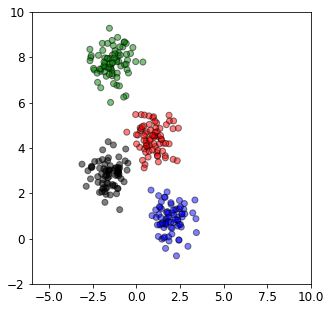

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color=X['Color'], alpha=0.5, edgecolor='k')
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

##**Implementing K-Means using scikit learn**

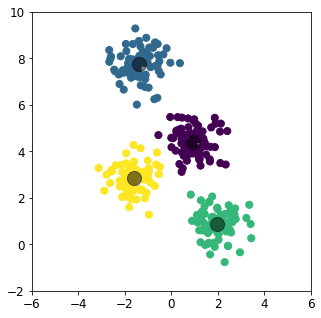

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

###Hai trường hợp khác nhau với các vị trí khởi điểm của centroids khác nhau

- Trường hợp 1:

In [ ]:
# Chạy 2 trường hợp khác nhau với các vị trí khởi điểm của centroids khác nhau
random_centroids = [[1,2],[3,4],[5,6],[7,8]]
random_centroids

[[1, 2], [3, 4], [5, 6], [7, 8]]

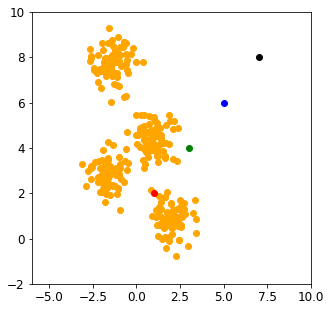

In [ ]:
# plotting the random_centroids 

plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color='orange')
length = len(random_centroids)
colors1=['r','g','b','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

In [ ]:
#Step-4

count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  X = assignment(X, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break
  
print(count)

Old Centroid [[1 2]
 [3 4]
 [5 6]
 [7 8]]
New Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
False
Old Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
New Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
True
3


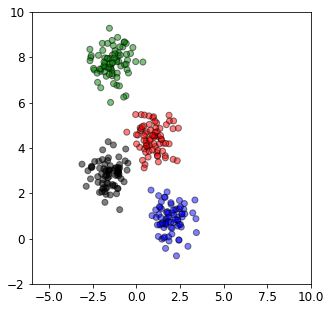

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color=X['Color'], alpha=0.5, edgecolor='k')
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

- Trường hợp 2:

In [ ]:
# Chạy 2 trường hợp khác nhau với các vị trí khởi điểm của centroids khác nhau
random_centroids = [[6,2],[1,4],[-2,6],[1,2]]
random_centroids

[[6, 2], [1, 4], [-2, 6], [1, 2]]

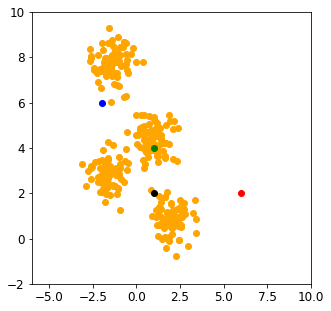

In [ ]:
# plotting the random_centroids 

plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color='orange')
length = len(random_centroids)
colors1=['r','g','b','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

In [ ]:
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  X = assignment(X, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)
  print(result)
  if result == True:
    break
  
print(count)

Old Centroid [[ 6  2]
 [ 1  4]
 [-2  6]
 [ 1  2]]
New Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
False
Old Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
New Centroid [[ 1.  4.]
 [-1.  8.]
 [ 2.  1.]
 [-2.  3.]]
True
3


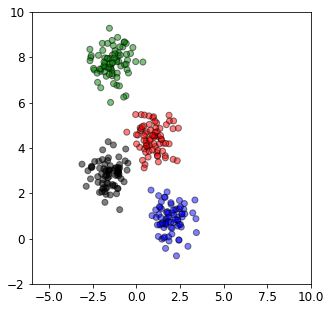

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,1], X.iloc[:,2], color=X['Color'], alpha=0.5, edgecolor='k')
plt.ylim(-2, 10)
plt.xlim(-6, 10)
plt.show()

## Phương pháp phân loại với k láng giềng gần nhất (k nearest neighbors - KNN):

Sau khi các bạn đã chạy thành công thuật toán k-means, lúc này tất cả các điểm dữ liệu đều được phân vào một trong các nhóm. 

Với một điểm dữ liệu mới ngẫu nhiên chưa được gán nhãn (hay phân nhóm), hãy tìm nhãn (nhóm) cho điểm dữ liệu này, sử dụng thuật toán k láng giềng gần nhất (k nearest neighbors - KNN) với k là 5.

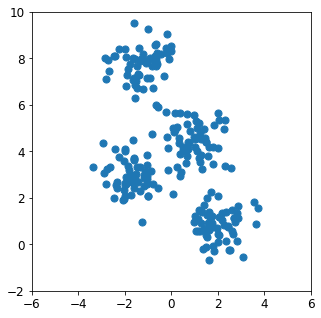

In [ ]:
# Cấu hình các tham số
Nb_cluster =  5
numIterations = 100
X_new, y_new = make_blobs(n_samples = 300, centers = 5,
                  random_state = 0, cluster_std = 0.7)

data_new = X_new

# change default figure and font size
plt.rcParams['figure.figsize'] = 5, 6 
plt.rcParams['font.size'] = 12

# scatter plot
plt.scatter(X_new[:, 0], X_new[:, 1], s = 50)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
#1.importing the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# importing the function load_iris which will return the iris dataset
from sklearn.datasets import load_iris
# for splitting the dataset into test and train
from sklearn.model_selection import train_test_split
# importing the metrics for measuring accuracy between predicted and true responses
from sklearn import metrics
#about to perform train/test split and find testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.4, random_state = 4)
print (X_train.shape)
print (X_test.shape)

(180, 2)
(120, 2)


In [ ]:
# 2. Instantiating the 'estimator'
knn = KNeighborsClassifier(n_neighbors = 5)

# 3. fit the model with data, aka 'model training'
knn.fit(X_train, y_train)

# 4. Predict the response for observations being passed, here 'X-test'
y_pred = knn.predict(X_test)

# getting the testing accuracy of KNN (K=5)
print (metrics.accuracy_score(y_test, y_pred))

0.9916666666666667


In [ ]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

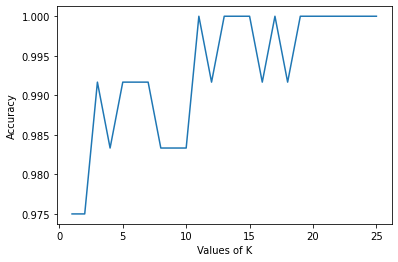

In [ ]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

In [ ]:
y_pred,y_test

(array([2, 0, 4, 0, 4, 0, 2, 0, 3, 4, 4, 3, 1, 4, 1, 4, 3, 2, 4, 1, 3, 2,
        0, 3, 4, 4, 3, 4, 4, 2, 0, 0, 2, 0, 2, 2, 2, 1, 3, 0, 1, 2, 4, 4,
        4, 3, 2, 1, 1, 3, 3, 1, 0, 2, 1, 1, 2, 0, 4, 3, 1, 2, 4, 2, 3, 4,
        0, 4, 0, 0, 2, 1, 4, 0, 0, 1, 1, 3, 4, 4, 0, 2, 0, 3, 1, 3, 3, 1,
        1, 3, 1, 2, 4, 4, 2, 2, 2, 4, 0, 4, 0, 1, 4, 1, 4, 4, 0, 2, 0, 2,
        4, 0, 2, 2, 0, 1, 0, 0, 3, 4]),
 array([2, 0, 4, 0, 4, 0, 2, 0, 3, 4, 4, 3, 1, 4, 1, 4, 3, 2, 4, 1, 3, 2,
        0, 3, 4, 4, 3, 4, 4, 2, 0, 0, 2, 0, 2, 2, 2, 1, 3, 0, 1, 2, 4, 4,
        4, 3, 2, 1, 1, 3, 3, 1, 0, 2, 1, 1, 2, 0, 4, 3, 1, 2, 4, 2, 3, 4,
        0, 4, 0, 0, 2, 1, 4, 0, 0, 1, 1, 3, 4, 4, 0, 2, 0, 3, 1, 3, 3, 1,
        1, 3, 1, 2, 4, 4, 2, 2, 2, 4, 0, 4, 0, 1, 4, 1, 4, 4, 0, 2, 0, 2,
        4, 0, 2, 2, 0, 1, 0, 0, 3, 4]))

In [ ]:
x, y = # sinh ngẫu nhiên một điểm dữ liệu mới có tọa độ (x,y) bằng thư viện random

# Thuật toán KNN

## 3. Học sâu (Deep Learning) - Đề mở:

Ở bài tập này, các bạn mô tả một bài toán về thị giác máy tính mà các bạn đã được học hoặc tự tìm hiểu. Sau đó, các bạn tự đề xuất mô hình học sâu và đưa ra đoạn mã nguồn xây dựng mô hình học sâu đó được huấn luyện với tập dữ liệu do các bạn chọn. 

Các bạn có thể tham khảo bất kỳ nguồn nào trong sách hoặc trên mạng và thực hiện lại. Tuy nhiên, các bạn phải để đường dẫn tham khảo bên dưới để giảng viên biết các bạn tham khảo từ nguồn nào.

**Khuyến khích:** các bạn nên chọn các ví dụ mẫu sử dụng một trong hai framework Tensorflow hoặc Pytorch cho bài tập này.

### link bài viết tham khảo
https://www.tensorflow.org/tutorials/images/classification

Link data:https://drive.google.com/drive/folders/160urTeiYwSTen91baxY3CM1_FpKDCxiy?usp=sharing

In [ ]:
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Định vị trí của dataset
data_dir = pathlib.Path('/content/drive/MyDrive/TNT_Group/train')

# Hiển thị thông tin về dataset (optional)
print('Training:')
print('Total # of 0 images:', len(list(data_dir.glob('train_signs/0/*.jpg'))))
print('Total # of 1 images:', len(list(data_dir.glob('train_signs/1/*.jpg'))))
print('Total # of 2 images:', len(list(data_dir.glob('train_signs/2/*.jpg'))))
print('Total # of 3 images:', len(list(data_dir.glob('train_signs/3/*.jpg'))))
print('Total # of 4 images:', len(list(data_dir.glob('train_signs/4/*.jpg'))))
print('Total # of 5 images:', len(list(data_dir.glob('train_signs/5/*.jpg'))))

print('Testing: ')
print('Total # of 0 images:', len(list(data_dir.glob('test_signs/0/*.jpg'))))
print('Total # of 1 images:', len(list(data_dir.glob('test_signs/1/*.jpg'))))
print('Total # of 2 images:', len(list(data_dir.glob('test_signs/2/*.jpg'))))
print('Total # of 3 images:', len(list(data_dir.glob('test_signs/3/*.jpg'))))
print('Total # of 4 images:', len(list(data_dir.glob('test_signs/4/*.jpg'))))
print('Total # of 5 images:', len(list(data_dir.glob('test_signs/5/*.jpg'))))

print('Validation: ')
print('Total # of 0 images:', len(list(data_dir.glob('test_signs/0/*.jpg'))))
print('Total # of 1 images:', len(list(data_dir.glob('test_signs/1/*.jpg'))))
print('Total # of 2 images:', len(list(data_dir.glob('test_signs/2/*.jpg'))))
print('Total # of 3 images:', len(list(data_dir.glob('test_signs/3/*.jpg'))))
print('Total # of 4 images:', len(list(data_dir.glob('test_signs/4/*.jpg'))))
print('Total # of 5 images:', len(list(data_dir.glob('test_signs/5/*.jpg'))))

Training:
Total # of 0 images: 141
Total # of 1 images: 146
Total # of 2 images: 142
Total # of 3 images: 142
Total # of 4 images: 144
Total # of 5 images: 149
Testing: 
Total # of 0 images: 20
Total # of 1 images: 20
Total # of 2 images: 20
Total # of 3 images: 20
Total # of 4 images: 20
Total # of 5 images: 20
Validation: 
Total # of 0 images: 20
Total # of 1 images: 20
Total # of 2 images: 20
Total # of 3 images: 20
Total # of 4 images: 20
Total # of 5 images: 20


In [ ]:
batch_size = 32 

img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      os.path.join(data_dir, 'train_signs'),
      seed = 123,
      image_size = (img_height, img_width),
      batch_size = batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      os.path.join(data_dir, 'val_signs'),
      seed = 123,
      image_size = (img_height, img_width),
      batch_size = batch_size)

Found 864 files belonging to 6 classes.
Found 216 files belonging to 6 classes.


['0', '1', '2', '3', '4', '5']


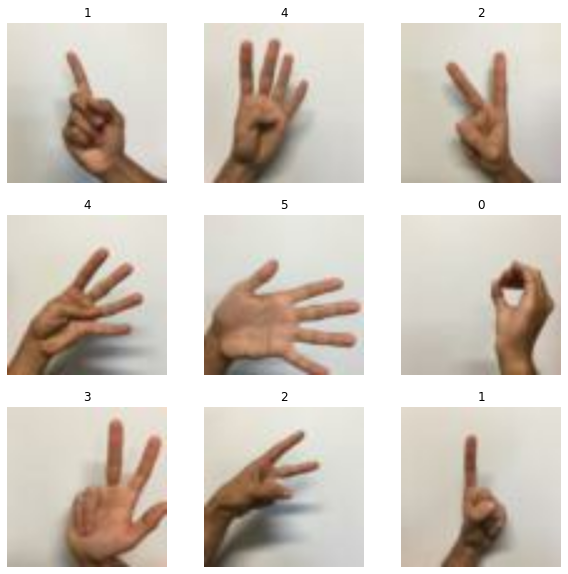

In [ ]:
#Hiển thị tất cả các lớp dữ liệu
class_names = train_ds.class_names

print(class_names)

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9) :
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 6
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense (num_classes, activation='softmax')])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 32)       

In [ ]:
# training
import time
start_time = time.time()

epochs=10
history = model.fit( train_ds, validation_data = val_ds, epochs = epochs)

training_time = (time.time() - start_time) /60
print("---Training time: %s minutes ----"% training_time)

Epoch 1/10
27/27 [==============================] - 132s 5s/step - loss: 2.0913 - accuracy: 0.1725 - val_loss: 1.7832 - val_accuracy: 0.1944
Epoch 2/10
27/27 [==============================] - 25s 899ms/step - loss: 1.7757 - accuracy: 0.2280 - val_loss: 1.7379 - val_accuracy: 0.3148
Epoch 3/10
27/27 [==============================] - 25s 899ms/step - loss: 1.6266 - accuracy: 0.3484 - val_loss: 1.4787 - val_accuracy: 0.4028
Epoch 4/10
27/27 [==============================] - 25s 900ms/step - loss: 1.4192 - accuracy: 0.4248 - val_loss: 1.3770 - val_accuracy: 0.5000
Epoch 5/10
27/27 [==============================] - 25s 910ms/step - loss: 1.1075 - accuracy: 0.6007 - val_loss: 1.1005 - val_accuracy: 0.6157
Epoch 6/10
27/27 [==============================] - 25s 903ms/step - loss: 0.8957 - accuracy: 0.6956 - val_loss: 0.8887 - val_accuracy: 0.6667
Epoch 7/10
27/27 [==============================] - 25s 908ms/step - loss: 0.7126 - accuracy: 0.7627 - val_loss: 0.8129 - val_accuracy: 0.7037
E

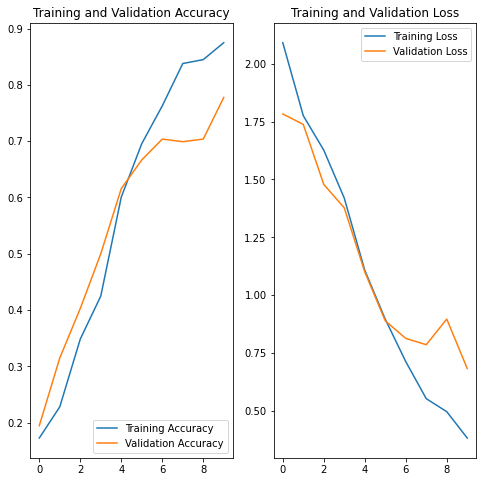

In [ ]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Đường dẫn tham khảo:
- Sách: Đắm mình vào học sâu (dive deep into deep learning)
- ...

# Bài tập lý thuyết:
#### 1. Hãy nêu định nghĩa của vấn đề overfitting.

Trả lời: 
Overfitting là hiện tượng mô hình tìm được quá khớp với tập dữ liệu training

#### 2. Mô hình có độ lỗi thấp trên tập huấn luyện sẽ cho ra kết quả tốt nhất khi dự đoán trên tập kiểm tra đúng hay sai?

Trả lời: Sai. Có thể bị hiện tượng overfitting dữ liệu chạy tốt trên tập train. Phải thử cả trên tập test để đánh giá mô hình chính xác nhất

#### 3. Bảng dưới đây thể hiện 04 mô hình với các tham số khác nhau trên một tập dữ liệu nào đó. Mô hình nào khớp với dữ liệu nhất?

| Mô hình | Tham số (intercept, slope) | Residual Sum of Square (RSS) |
|---------|----------------------------|------------------------------|
| 1       |     (0, 1.4)               |     20.51                    |
| 2       |     (3.1, 1.4)             |     15.23                    |
| 3       |     (2.7, 1.9)             |     13.67                    |
| 4       |     (0, 2.3)               |     18.99                    |

Trả lời: Mô hình 3 khớp với dữ liệu nhất. Tổng bình phương giá trị thực tế và giá trị dự đoán càng nhỏ mô hình càng chính xác

#### 4. Mô hình đề xuất dựa trên **mức độ phổ biến toàn cục** có thể (có thể chọn nhiều đáp án):
-   Cá nhân hóa
-   Nắm bắt ngữ cảnh (Ví dụ: thời gian trong ngày)
-   Không điều nào ở trên đúng

Trả lời: Nắm bắt ngữ cảnh 

#### 5. Mô hình đề xuất dựa trên **phương pháp phân loại** có thể (có thể chọn nhiều đáp án):
-   Cá nhân hóa
-   Nắm bắt ngữ cảnh (Ví dụ: thời gian trong ngày)
-   Không điều nào ở trên đúng

Trả lời:Cá nhân hóa, Nắm bắt ngữ cảnh

#### 6. Mô hình đề xuất sử dụng **ma trận đồng xuất hiện** (có thể chọn nhiều đáp án):
-   Cá nhân hóa
-   Nắm bắt ngữ cảnh (Ví dụ: thời gian trong ngày)
-   Không điều nào ở trên đúng

Trả lời: Cá nhân hóa


#### 7. Mô hình đề xuất sử dụng **ma trận phân rã** (có thể chọn nhiều đáp án):
-   Cá nhân hóa
-   Nắm bắt ngữ cảnh (Ví dụ: thời gian trong ngày)
-   Không điều nào ở trên đúng

Trả lời: Nắm bắt ngữ cảnh

#### 8. Chuẩn hóa **ma trận đồng xuất hiện** được sử dụng chủ yếu để trích xuất thông tin nào?

Trả lời: Đề xuất những item phù hợp trên ma trận item x item. 
  Vd: Xét 1 phần tử trên đường chéo của ma trận item x item, xét hàng chứa phần tử đó ta đề xuất lần lượt các item có giá trị phần tử từ lớn đến bé. Tuy nhiên việc đề xuất này gặp nhiều bất cập khi có item quá phổ biến làm nhấn chìm các tính chất khác nên ta có các phương pháp chuẩn hóa để đề xuất hiệu quả hơn.

#### 9. Một cửa hàng có 3 khách hàng và 3 sản phẩm. Trong 02 bảng dưới đây là các vectơ đặc trưng đã trích lọc (extract) cho từng người dùng và sản phẩm. Dựa trên mô hình ước tính này, sản phẩm nào bạn sẽ giới thiệu cho người dùng thứ 2 trong bảng?

|     Người dùng |     Vectơ đặc trưng       |
|----------------|---------------------------|
|     1          |     (1.73, 0.01, 5.22)    |
|     2          |     (0.03, 4.41, 2.05)    |
|     3          |     (1.13, 0.89, 3.76)    |

|     Sản phẩm |     Vectơ đặc trưng       |
|--------------|---------------------------|
|     1        |     (3.29, 3.44, 3.67)    |
|     2        |     (0.82, 9.71, 3.88)    |
|     3        |     (8.34, 1.72, 0.02)    |

Trả lời: 
  Giới thiệu sản phẩm 2 cho người dùng 2. 
  Đề xuất(người dùng, sản phẩm) = 0.03*0.82 + 4.41*9.71 + 2.05*3.88 = 50.7997
#### 10. Xem hình ảnh ở link sau: https://prnt.sc/26lwrte. Đối với các mặt hàng được yêu thích và hệ thống đề xuất hiển thị dưới đây, hãy tính **recall** và làm tròn đến 2 chữ số thập phân. (Như trong bài học, hình vuông màu xanh lá cây chỉ ra các mặt hàng được hệ thống đề xuất, hình vuông màu đỏ tươi là những mặt hàng được yêu thích. Các mục không được khuyến nghị được xám cho rõ ràng.) (Trả lời bằng nhập số thập phân)

Trả lời: 1

#### 11. Xem hình ảnh ở link sau: https://prnt.sc/26lwt6s. Đối với các mục thích và được đề xuất hiển thị bên dưới, hãy tính **precision** và làm tròn đến 2 chữ số thập phân. (Như trong bài học, hình vuông màu xanh lá cây chỉ ra các mặt hàng được đề xuất, hình vuông màu đỏ tươi là những mặt hàng được yêu thích. Các mục không được khuyến nghị được xám cho rõ ràng.) (Trả lời bằng nhập số thập phân)

Trả lời: 0.25

#### 12. Dựa vào biểu đồ đường cong precision-recall trong hình ảnh ở link sau: https://prnt.sc/26lwtuw, hệ thống đề xuất nào nên được đưa vào sử dụng?

Trả lời:
- RecSys #1: ma trận phân rã.
- RecSys #2: ma trận đồng xuất hiện.
- RecSys #3: mô hình phân loại.

# Hướng dẫn nộp bài:
1. Các bạn làm xong bài, download về dưới dạng file .ipynb, và file .html.
2. Nén cả 2 file lại và đặt MãSốHọcViên_HọTên.zip hoặc MãSốHọcViên_HọTên.rar
3. Sau đó nộp bài tại link: https://forms.gle/2G2z2wnq1Kahs3Li7
**Lưu ý: các bạn chỉ được nộp 1 lần duy nhất, nên kiểm tra kỹ trước khi nộp bài.**